Cleaned data points: 150
NumPy operations results:
Mean PER: 15.83
Median USG%: 23.8
Standard Deviation of WS: 3.10
Max VORP: 6.2
Min TOV%: 5.4

Pearson correlation PER vs WS: r = 0.08, p = 0.3233
                            OLS Regression Results                            
Dep. Variable:                     WS   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.108
Date:                Mon, 26 May 2025   Prob (F-statistic):              0.333
Time:                        06:04:16   Log-Likelihood:                -381.30
No. Observations:                 150   AIC:                             768.6
Df Residuals:                     147   BIC:                             777.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
             

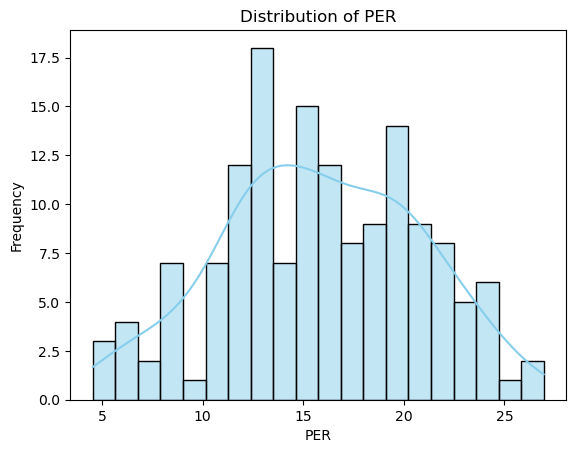

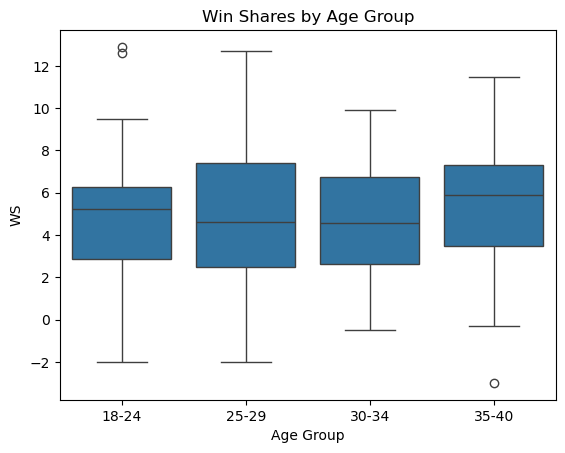

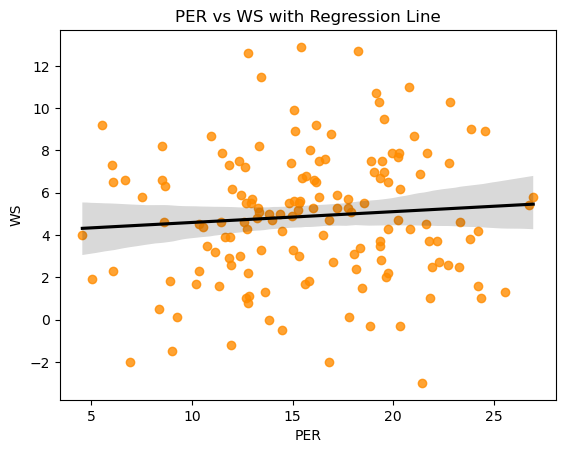


Data points after outlier removal: 150
Pearson correlation USG% vs TOV%: r = 0.02, p = 0.7803


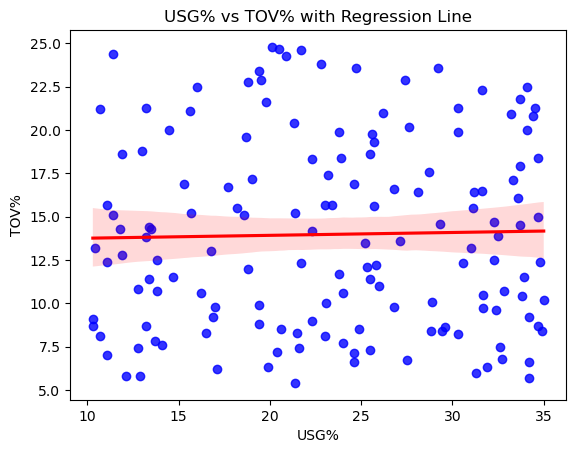

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

np.random.seed(42)
num_entries = 150

df = pd.DataFrame({
    'Player': [f'Player {i+1}' for i in range(num_entries)],
    'Age': np.random.randint(19, 40, size=num_entries),
    'MP': np.random.randint(1000, 3300, size=num_entries),
    'PER': np.random.normal(loc=15, scale=5, size=num_entries).round(2),
    'USG%': np.random.uniform(10, 35, size=num_entries).round(1),
    'TOV%': np.random.uniform(5, 25, size=num_entries).round(1),
    'WS': np.random.normal(loc=5, scale=3, size=num_entries).round(1),
    'VORP': np.random.normal(loc=1.5, scale=2, size=num_entries).round(1)
})

df_clean = df.dropna()
print(f"Cleaned data points: {df_clean.shape[0]}")

print("NumPy operations results:")
print(f"Mean PER: {np.mean(df_clean['PER']):.2f}")
print(f"Median USG%: {np.median(df_clean['USG%']):.1f}")
print(f"Standard Deviation of WS: {np.std(df_clean['WS']):.2f}")
print(f"Max VORP: {np.max(df_clean['VORP'])}")
print(f"Min TOV%: {np.min(df_clean['TOV%'])}\n")

corr1, pval1 = pearsonr(df_clean['PER'], df_clean['WS'])
print(f"Pearson correlation PER vs WS: r = {corr1:.2f}, p = {pval1:.4f}")

X = df_clean[['PER', 'MP']]
X = sm.add_constant(X)
y = df_clean['WS']
model = sm.OLS(y, X).fit()
print(model.summary())

sns.histplot(df_clean['PER'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of PER")
plt.xlabel("PER")
plt.ylabel("Frequency")
plt.show()

df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=[18, 24, 29, 34, 40], labels=["18-24", "25-29", "30-34", "35-40"])
sns.boxplot(x='AgeGroup', y='WS', data=df_clean)
plt.title("Win Shares by Age Group")
plt.xlabel("Age Group")
plt.ylabel("WS")
plt.show()

sns.regplot(x='PER', y='WS', data=df_clean, scatter_kws={"color": "darkorange"}, line_kws={"color": "black"})
plt.title("PER vs WS with Regression Line")
plt.xlabel("PER")
plt.ylabel("WS")
plt.show()

Q1_per = df_clean['PER'].quantile(0.25)
Q3_per = df_clean['PER'].quantile(0.75)
IQR_per = Q3_per - Q1_per

Q1_ws = df_clean['WS'].quantile(0.25)
Q3_ws = df_clean['WS'].quantile(0.75)
IQR_ws = Q3_ws - Q1_ws

df_no_outliers = df_clean[
    (df_clean['PER'] >= Q1_per - 1.5 * IQR_per) & (df_clean['PER'] <= Q3_per + 1.5 * IQR_per) &
    (df_clean['WS'] >= Q1_ws - 1.5 * IQR_ws) & (df_clean['WS'] <= Q3_ws + 1.5 * IQR_ws)
]
print(f"\nData points after outlier removal: {df_no_outliers.shape[0]}")

corr2, pval2 = pearsonr(df_no_outliers['USG%'], df_no_outliers['TOV%'])
print(f"Pearson correlation USG% vs TOV%: r = {corr2:.2f}, p = {pval2:.4f}")

sns.regplot(x='USG%', y='TOV%', data=df_no_outliers, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("USG% vs TOV% with Regression Line")
plt.xlabel("USG%")
plt.ylabel("TOV%")
plt.show()
